# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [27]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [28]:
# Read your api key environment variable
api = ("9e9cc3e48ba34465974cf84747925daa")

In [29]:
# Create a newsapi client
from newsapi import NewsApiClient 
newsapi = NewsApiClient(api)

In [30]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)

In [31]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q="Ethereum",
    language="en"
)

In [32]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["compound", "positive", "negative", "neutral", "text"]
btc_df = btc_df[cols]

btc_df.head()

,compound,positive,negative,neutral,text
0,0.3182,0.091,0.000,0.909,Elon Musks cryptocurrency hype was more than j...
1,0.3818,0.071,0.000,0.929,"Tesla, led by Elon Musk, confirmed that it pur..."
2,-0.1027,0.000,0.038,0.962,"For a brief moment on Sunday, before Tesla sai..."
3,0.2500,0.056,0.000,0.944,Twitter and Square CEO Jack Dorsey and rapper ...
4,0.6597,0.137,0.000,0.863,"Today in an SEC filing, Tesla disclosed that i..."


In [33]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["compound", "positive", "negative", "neutral", "text"]
eth_df = eth_df[cols]

eth_df.head()


,compound,positive,negative,neutral,text
0,-0.3400,0.063,0.119,0.818,Worried that the GeForce RTX 3060 will be sold...
1,0.0000,0.000,0.000,1.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.0000,0.000,0.000,1.000,By Reuters Staff\r\nFILE PHOTO: Representation...
3,0.4404,0.091,0.000,0.909,NFTs (non-fungible tokens) — or scarce digital...
4,0.0258,0.030,0.000,0.970,While the first Christie's auction of digital ...


In [34]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.282756,0.077333,0.012722,0.909889
std,0.332195,0.064251,0.026797,0.059923
min,-0.381800,0.000000,0.000000,0.754000
25%,0.025675,0.042750,0.000000,0.869000
50%,0.284100,0.068500,0.000000,0.914000
75%,0.559650,0.110000,0.000000,0.952250
max,0.831600,0.246000,0.082000,1.000000


In [35]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.221340,0.056950,0.005950,0.937100
std,0.287580,0.055042,0.026609,0.061753
min,-0.340000,0.000000,0.000000,0.818000
25%,0.000000,0.000000,0.000000,0.883500
50%,0.172000,0.067000,0.000000,0.929000
75%,0.453775,0.096500,0.000000,1.000000
max,0.709600,0.144000,0.119000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin 

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Bitcoin 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [36]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [37]:
def tokenizer(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
#     cl = re.sub(r'[^.,a-zA-Z0-9]',' ', content)
#     cl2 = re.sub(r'[0-9]+.', ' ', cl)
#     cl3 = re.sub(r'\b[a-zA-Z]\b', ' ', cl2)
#     cl4 = re.sub(r',', ' ', cl3)
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    output = [word.lower() for word in words if word.lower() not in sw]
    return output 

In [38]:
# Create a new tokens column for bitcoin
word_tokenized = []
for text in btc_df["text"]:
    token = tokenizer(text)
    word_tokenized.append({"tokens": token})
    
btc_with_tokens = pd.DataFrame(word_tokenized)
btc_df['tokens'] = btc_with_tokens
btc_df.head()

,compound,positive,negative,neutral,text,tokens
0,0.3182,0.091,0.000,0.909,Elon Musks cryptocurrency hype was more than j...,"[elon, musks, cryptocurrency, hype, idle, talk..."
1,0.3818,0.071,0.000,0.929,"Tesla, led by Elon Musk, confirmed that it pur...","[tesla, led, elon, musk, confirmed, purchased,..."
2,-0.1027,0.000,0.038,0.962,"For a brief moment on Sunday, before Tesla sai...","[brief, moment, sunday, tesla, said, invested,..."
3,0.2500,0.056,0.000,0.944,Twitter and Square CEO Jack Dorsey and rapper ...,"[twitter, square, ceo, jack, dorsey, rapper, j..."
4,0.6597,0.137,0.000,0.863,"Today in an SEC filing, Tesla disclosed that i...","[today, sec, filing, tesla, disclosed, acquire..."


In [39]:
# Create a new tokens column for ethereum
word_tokenized = []
for text in eth_df["text"]:
    token = tokenizer(text)
    word_tokenized.append({"tokens": token})
    
eth_with_tokens = pd.DataFrame(word_tokenized)
eth_df['tokens'] = eth_with_tokens
eth_df.head()

,compound,positive,negative,neutral,text,tokens
0,-0.3400,0.063,0.119,0.818,Worried that the GeForce RTX 3060 will be sold...,"[worried, geforce, rtx, sold, cryptocurrency, ..."
1,0.0000,0.000,0.000,1.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
2,0.0000,0.000,0.000,1.000,By Reuters Staff\r\nFILE PHOTO: Representation...,"[reuters, stafffile, photo, representation, et..."
3,0.4404,0.091,0.000,0.909,NFTs (non-fungible tokens) — or scarce digital...,"[nfts, nonfungible, tokens, scarce, digital, c..."
4,0.0258,0.030,0.000,0.970,While the first Christie's auction of digital ...,"[first, christies, auction, digital, artwork, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [40]:
from collections import Counter
from nltk import ngrams

In [46]:
# Generate the Bitcoin N-grams where N=2
btc_bigrams = btc_df['text']

def bigram_counter(btc_bigrams): 
    big_string = ' '.join(btc_bigrams)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

bigram_counter(btc_bigrams)

,bigram,count
0,"(billion, bitcoin)",3
1,"(elon, musks)",2
2,"(jack, dorsey)",2
3,"(jay, z)",2
4,"(popular, cryptocurrency)",2
5,"(bitcoin, future)",2
6,"(chars, bitcoin)",2
7,"(cryptocurrency, exchange)",2
8,"(alltime, high)",2
9,"(daily, crunch)",2


In [47]:
# Generate the Ethereum N-grams where N=2
eth_bigrams = eth_df['text']

def bigram_counter(eth_bigrams): 
    big_string = ' '.join(eth_bigrams)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

bigram_counter(eth_bigrams)

,bigram,count
0,"(chars, reuters)",4
1,"(feb, reuters)",4
2,"(chars, new)",4
3,"(new, york)",4
4,"(record, high)",4
5,"(photo, representation)",3
6,"(representation, ethereum)",3
7,"(ethereum, virtual)",3
8,"(virtual, currency)",3
9,"(currency, standing)",3


In [48]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [49]:
# Get the top 10 words for Bitcoin
btc_top_ten= []
for article in btc_df['tokens']:
    for words in article:
        btc_top_ten.append(words)
        
token_count(btc_top_ten)

[('chars', 18),
 ('bitcoin', 13),
 ('cryptocurrency', 8),
 ('tesla', 6),
 ('billion', 4),
 ('elon', 3),
 ('future', 3),
 ('said', 3),
 ('dorsey', 3),
 ('company', 3)]

In [50]:
# Get the top 10 words for Ethereum
eth_top_ten= []
for article in eth_df['tokens']:
    for words in article:
        eth_top_ten.append(words)
        
token_count(eth_top_ten)

[('chars', 20),
 ('ethereum', 14),
 ('reuters', 13),
 ('cryptocurrency', 7),
 ('new', 7),
 ('week', 7),
 ('bitcoin', 6),
 ('record', 6),
 ('february', 5),
 ('high', 5)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

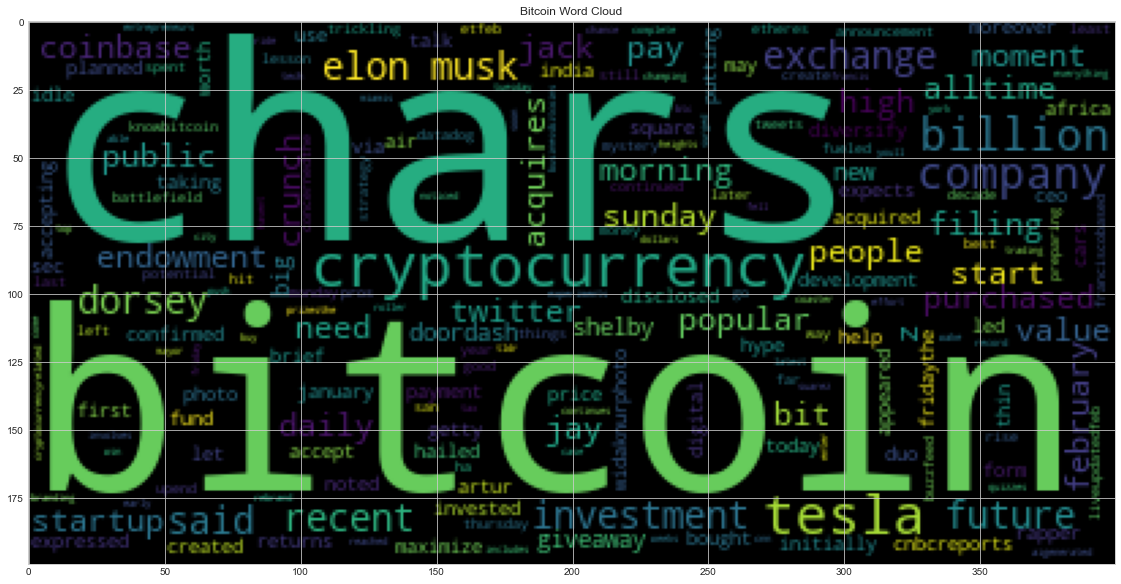

In [58]:
# Generate the Bitcoin word cloud
btc_word_cloud = ' '.join(btc_top_ten)
wc = WordCloud().generate(btc_word_cloud)
plt.title("Bitcoin Word Cloud")
plt.imshow(wc)

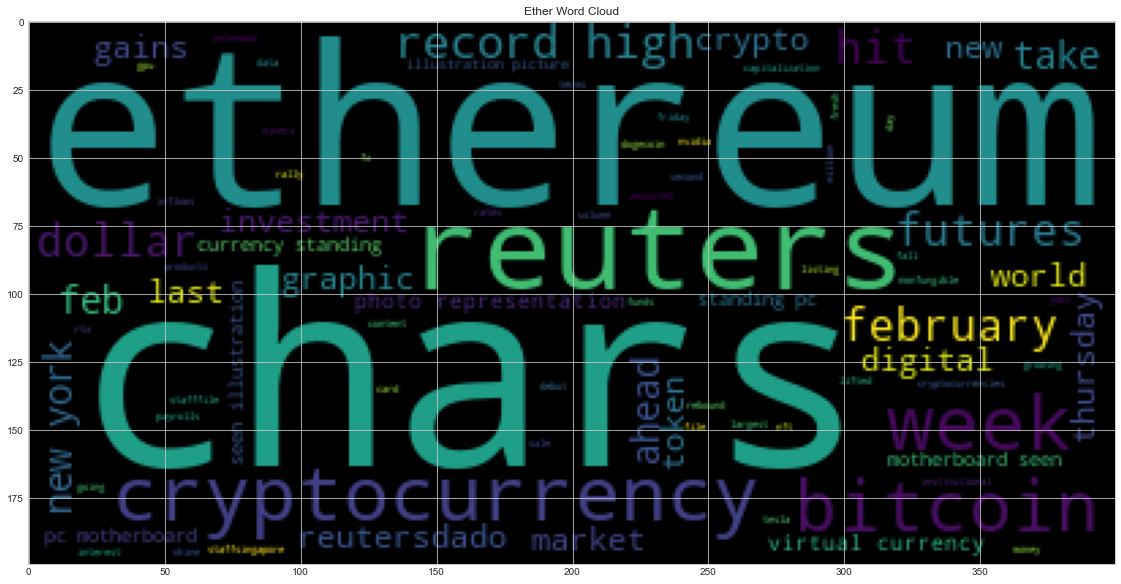

In [59]:
# Generate the Ethereum word cloud
eth_word_cloud = ' '.join(eth_top_ten)
wc = WordCloud().generate(eth_word_cloud)
plt.title("Ether Word Cloud")
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [60]:
import spacy
from spacy import displacy

In [64]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [65]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [69]:
# Concatenate all of the bitcoin text together
btc_text_concat = " ".join(btc_df.text)
btc_text_concat

"Elon Musks cryptocurrency hype was more than just idle talk. CNBCreports that Tesla not only bought $1.5 billion worth of Bitcoin to help diversify and maximize its returns, but will start taking pay… [+1182 chars] Tesla, led by Elon Musk, confirmed that it purchased about $ 1.5 billion in bitcoin in January and expects to start accepting it as a payment in the future.\xa0 | Photo by Artur Widak/NurPhoto via Getty… [+6118 chars] For a brief moment on Sunday, before Tesla said it had invested $1.5 billion in bitcoin and planned to let people use the cryptocurrency to pay for its cars, bitcoins price could be expressed with a … [+3302 chars] Twitter and Square CEO Jack Dorsey and rapper Jay Z have created an endowment to fund bitcoin development initially in Africa and India, Dorsey said Friday.\r\nThe duo is putting 500 bitcoin, which is … [+3984 chars] Today in an SEC filing, Tesla disclosed that it has acquired $1.5 billion in bitcoin, the popular cryptocurrency. Moreover, the compan

In [70]:
# Run the NER processor on all of the text
btc_text_concat = nlp(btc_text_concat)
displacy.render(btc_text_concat)

In [72]:
# List all Entities
for entity in btc_text_concat.ents:
    print(entity.text, entity.label_)

Elon Musks ORG
Tesla ORDINAL
$1.5 billion MONEY
Bitcoin GPE
Tesla ORDINAL
Elon Musk PERSON
about $ 1.5 billion MONEY
bitcoin GPE
January DATE
Artur Widak PERSON
Getty PERSON
Sunday DATE
Tesla ORDINAL
$1.5 billion MONEY
bitcoin GPE
Twitter PERSON
Square PERSON
Jack Dorsey PERSON
Jay Z PERSON
Africa LOC
India GPE
Dorsey GPE
Friday DATE
500 CARDINAL
Today DATE
SEC ORG
Tesla ORDINAL
$1.5 billion MONEY
bitcoin GPE
Bitcoin GPE
first ORDINAL
more than a decade later DATE
Feb. 9, 2021 DATE
8:01 a.m. TIME
ET PERSON
Feb. 9, 2021 DATE
8:01 a.m. TIME
ET PERSON
Bitcoin GPE
Teslas GPE
Monday DATE
1.5 MONEY
Coinbase PRODUCT
San Francisco GPE
last year DATE
Thursday DATE
Bitcoin GPE
this morning TIME
over $50,000 MONEY
Elon Musks ORG
Jack Dorsey PERSON
Jay Z PERSON
Datadog PERSON
Startup ORG
BuzzFeed ORG
Daily Crunch WORK_OF_ART
February 12, 2021 DATE
Miamis NORP
Francis Suarez PERSON
Bitcoins PERSON
recent weeks DATE
Friday DATE
the The Complete Bitcoin ORG
BTC ORG
Investment Giveaway PERSON
over $12

---

## Ethereum NER

In [74]:
# Concatenate all of the bitcoin text together
eth_text_concat = " ".join(eth_df.text)
eth_text_concat

"Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [+1652 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nTOKYO (Reuters) - E… [+472 chars] By Reuters Staff\r\nFILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration/Fi… [+1379 chars] NFTs (non-fungible tokens) — or scarce digital content represented as tokens — are driving a new wave of crypto adoption.\r\nThanks to the Ethereum blockchain, artists, gaming companies and content cre… [+5365 chars] While the first Christie's auction of digital artwork backed by NFT (non-fungible token) is still a few days away, one of the most not

In [75]:
# Run the NER processor on all of the text
eth_text_concat = nlp(eth_text_concat)
displacy.render(eth_text_concat)

In [76]:
# List all Entities
for entity in eth_text_concat.ents:
    print(entity.text, entity.label_)

February 3, 2018 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters ORG
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
first ORDINAL
Christie's ORG
NFT ORG
a few days DATE
one CARDINAL
Chris Torres PERSON
3060 CARDINAL
GPU ORG
next week DATE
Nvidia ORG
this morning TIME
Reuters ORG
Bitcoin GPE
Marseille GPE
France GPE
February 7, 2021 DATE
REUTERS ORG
Eric Gaillard PERSON
SINGAPORE PERSON
Reuters ORG
Reuters ORG
SINGAPORE ORG
Feb 9 DATE
Reuters ORG
Asia LOC
Tuesday DATE
bitcoin GPE
Tesla Inc ORG
bitcoin GPE
NEW YORK GPE
Reuters ORG
second ORDINAL
Thursday DATE
NEW YORK GPE
Feb 18 DATE
Reuters ORG
second ORDINAL
Thursday DATE
February 3, 2018 DATE
REUTERS/ ORG
LONDON GPE
Friday DATE
Bitcoin GPE
Tesla ORDINAL
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ORG
the week DATE
1,935.57 MONEY
the week DATE
San Francisco GPE
last year DATE
Thursday DATE
Company News ORG
Anna Irrera PERSON
Dogecoin PERSON
Dogecoin PERSON
nearly 68% PERCENT
0.054496